In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import scipy.ndimage as spi
import scipy.signal as sps
from skimage import filters

%matplotlib inline
pass

In [149]:
with open("I-anticrossing_raw_data.pkl", "rb") as f:
    data_dict = pickle.load(f)

In [150]:
data_dict.keys()

dict_keys(['Current [A]', 'data', 'frequency'])

In [151]:
# get data
data = data_dict['data']+.5e-2*(np.random.normal(size = data_dict['data'].shape)+
                             1j*np.random.normal(size = data_dict['data'].shape))
data_abs = np.abs(data)
data_angle = np.unwrap(np.angle(data))

In [152]:
# init windows
dx_window = 0.5 * np.array([[0, 0, 0], [1, 0, -1], [0, 0, 0]])
lapl_window = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
dx2_window = np.array([[0, 0, 0], [1, -2, 1], [0, 0, 0]])
dy2_window = np.array([[0, 1, 0], [0, -2, 0], [0, 1, 0]])
dxdy_window = 0.25 * np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])

In [153]:
def plot(data):
    plt.pcolormesh(data.T, cmap='RdBu')
    plt.colorbar()

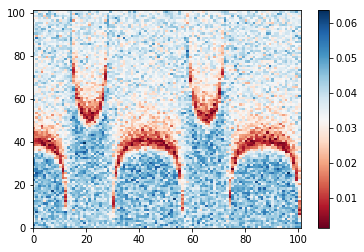

In [154]:
plot(data_abs)

In [155]:
# laplassian

In [156]:
lapl_result = sps.convolve2d(data_abs, lapl_window, mode='valid')

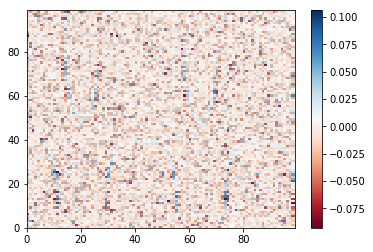

In [157]:
plot(lapl_result)

In [158]:
# TODO:
# imaginary part

In [159]:
# derivates windows

In [160]:
dx2_result = sps.convolve2d(data_abs, dx2_window, mode='valid')
dy2_result = sps.convolve2d(data_abs, dy2_window, mode='valid')
dxdy_result = sps.convolve2d(data_abs, dxdy_window, mode='valid')

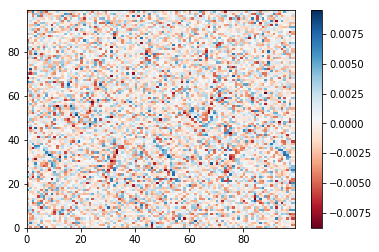

In [161]:
plot(dxdy_result)

In [162]:
# imaginary part

In [163]:
data_angle = np.unwrap(np.angle(data))

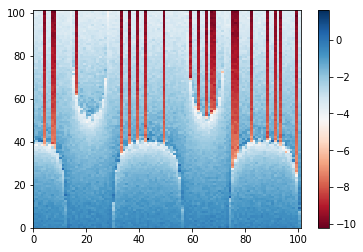

In [164]:
plot(data_angle)

In [165]:
dx_result = sps.convolve2d(data_angle, dx_window, mode='valid')
dx_min, dx_max = np.min(dx_result), np.max(dx_result)
dx_result = (dx_result - dx_min) / (dx_max - dx_min)

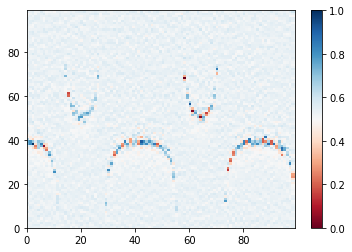

In [166]:
plot(dx_result)

In [167]:
lapl_result = sps.convolve2d(data_angle, lapl_window, mode='valid')

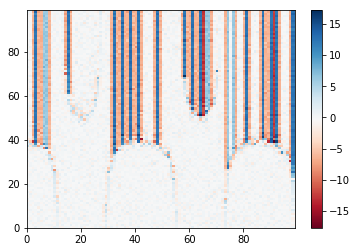

In [168]:
plot(lapl_result)

In [169]:
# clasterization

In [170]:
import sklearn.cluster as skcl

In [171]:
threshold = filters.threshold_otsu(dx_result)
binary = np.where(dx_result > threshold , 1, 0)
print('threshold: {}'.format(threshold))

threshold: 0.623046875


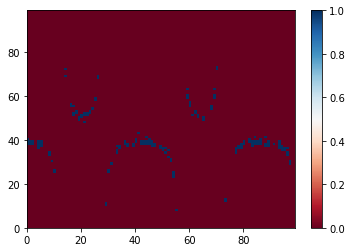

In [172]:
plot(binary)

In [173]:
X = np.argwhere(binary == 1)

In [174]:
cl = skcl.KMeans(n_clusters=5)

In [175]:
y_pred = cl.fit_predict(X)

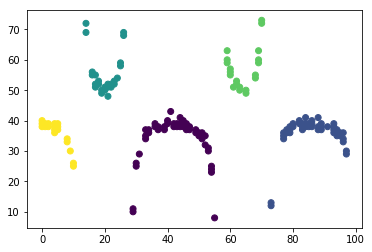

In [181]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [177]:
X[:, 0]

array([ 0,  0,  0,  1,  1,  2,  2,  4,  4,  4,  4,  5,  5,  5,  8,  8,  9,
       10, 10, 14, 14, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21,
       21, 22, 22, 23, 23, 24, 25, 25, 26, 26, 29, 29, 30, 30, 31, 33, 33,
       33, 34, 34, 36, 36, 37, 37, 39, 39, 40, 40, 41, 42, 42, 43, 43, 44,
       44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 49, 49, 50, 50, 51, 51, 52,
       52, 53, 53, 54, 54, 54, 55, 59, 59, 59, 60, 60, 60, 61, 62, 62, 63,
       63, 65, 65, 68, 68, 69, 69, 69, 70, 70, 73, 73, 77, 77, 77, 78, 78,
       79, 79, 79, 80, 80, 82, 82, 83, 83, 83, 84, 84, 84, 85, 85, 86, 86,
       86, 88, 88, 88, 89, 89, 89, 91, 93, 93, 93, 93, 94, 94, 94, 95, 95,
       96, 96, 96, 97, 97])